**IMPORTING DEPENDENCIES**

In [155]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Collection and Pre-Processing

In [156]:
# location of the file
file_path = "C:/Users/USER/Desktop/Datasets/Rainfall.csv"

In [157]:
# loading the file into a pandas dataframe
rain_df = pd.read_csv(file_path)

In [158]:
# first 5 rows of the data
rain_df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [159]:
# last 5 rows 
rain_df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [160]:
# checking number of rows and columns 
rain_df.shape

(366, 12)

In [161]:
# Dataset basic information 
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [162]:
 # remove trailing space in all columns names 
rain_df.columns = rain_df.columns.str.strip()

In [163]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [164]:
# Checking number of missing values
rain_df.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [165]:
# handling the missing values 

# filling the missing wind direction with the most frequent value or mode
rain_df['winddirection'] = rain_df['winddirection'].fillna(rain_df['winddirection'].mode()[0])
# filling the missing wind speed with the median value or median
rain_df['windspeed'] = rain_df['windspeed'].fillna(rain_df['windspeed'].median())


In [166]:
# Checking number of missing values
rain_df.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [167]:
# distinct values in rainfall column
rain_df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [168]:
# convert 'yes'and  'no' to numerical values 
rain_df['rainfall'] = rain_df['rainfall'].map({'yes':1, 'no':0})
print(rain_df['rainfall'])

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64


**EXPLORATORY DATA ANALYSIS**

In [169]:
# setting style for all plots 
sns.set(style='whitegrid')

In [170]:
# basic statistical summary  
rain_df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


**Distribution of Rainfall**

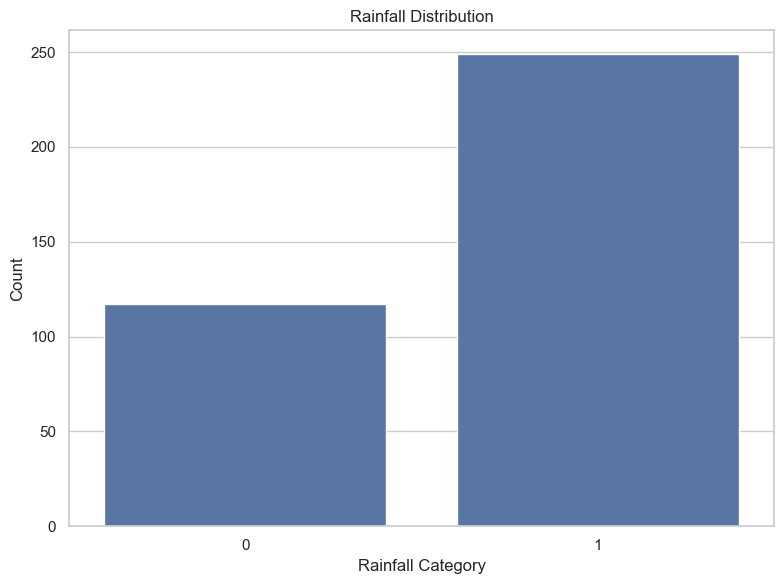

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(data=rain_df, x='rainfall')

plt.title('Rainfall Distribution')
plt.xlabel('Rainfall Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Distribution of other features**


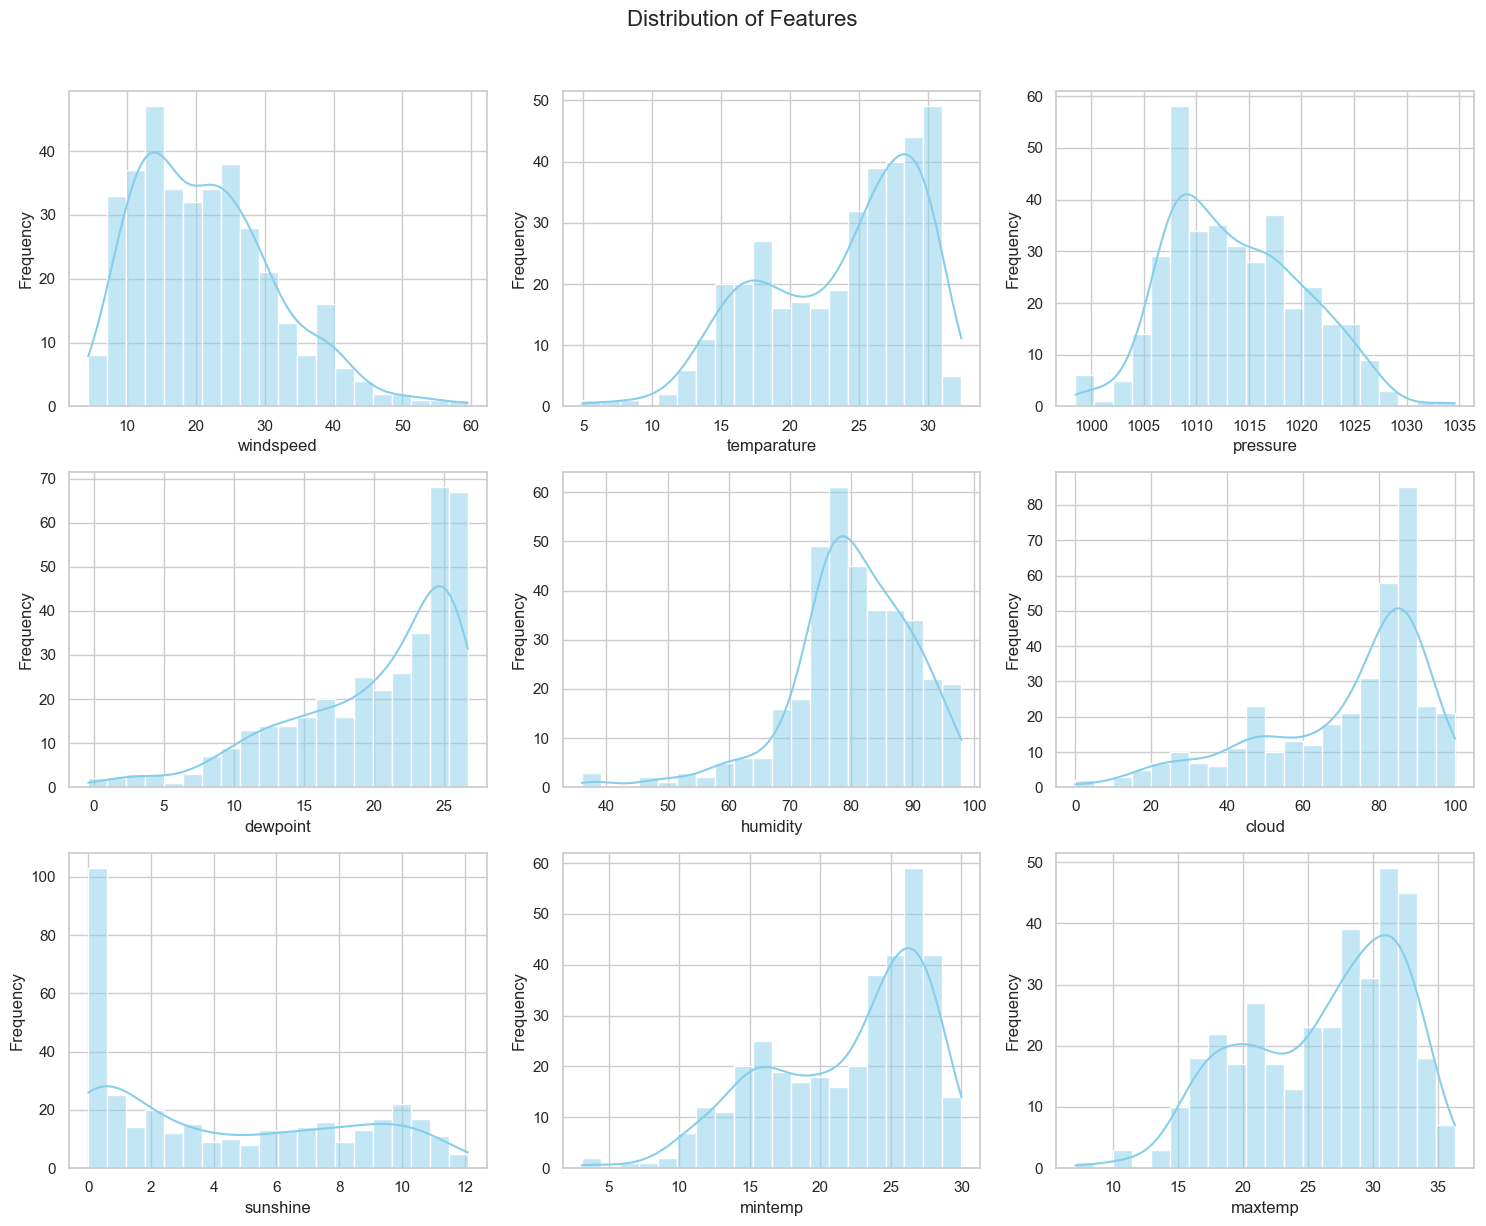

In [172]:
# List of columns to plot
columns_to_plot = [
    'windspeed', 'temparature', 'pressure', 'dewpoint',
    'humidity', 'cloud', 'sunshine', 'mintemp', 'maxtemp'
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot[:9]):
    sns.histplot(rain_df[col], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(columns_to_plot[:9]), len(axes)):
    axes[j].axis('off')
fig.suptitle('Distribution of Features', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


**CORRELATION OF FEATURES**

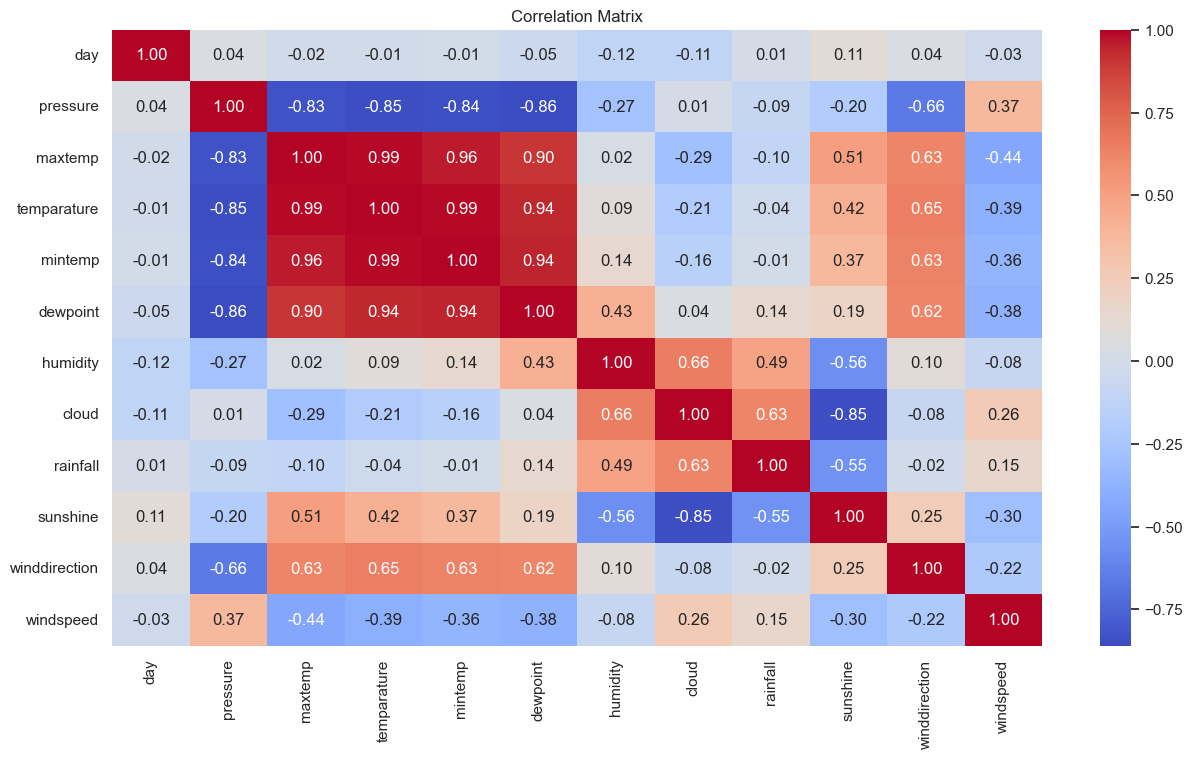

In [173]:
# correlation matrix using heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(rain_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Note: There is multicollinearity among maxtemp, mintemp, temparature, and dewpoint

**VISUALIZING OUTLIERS FOR THE FEATURES**

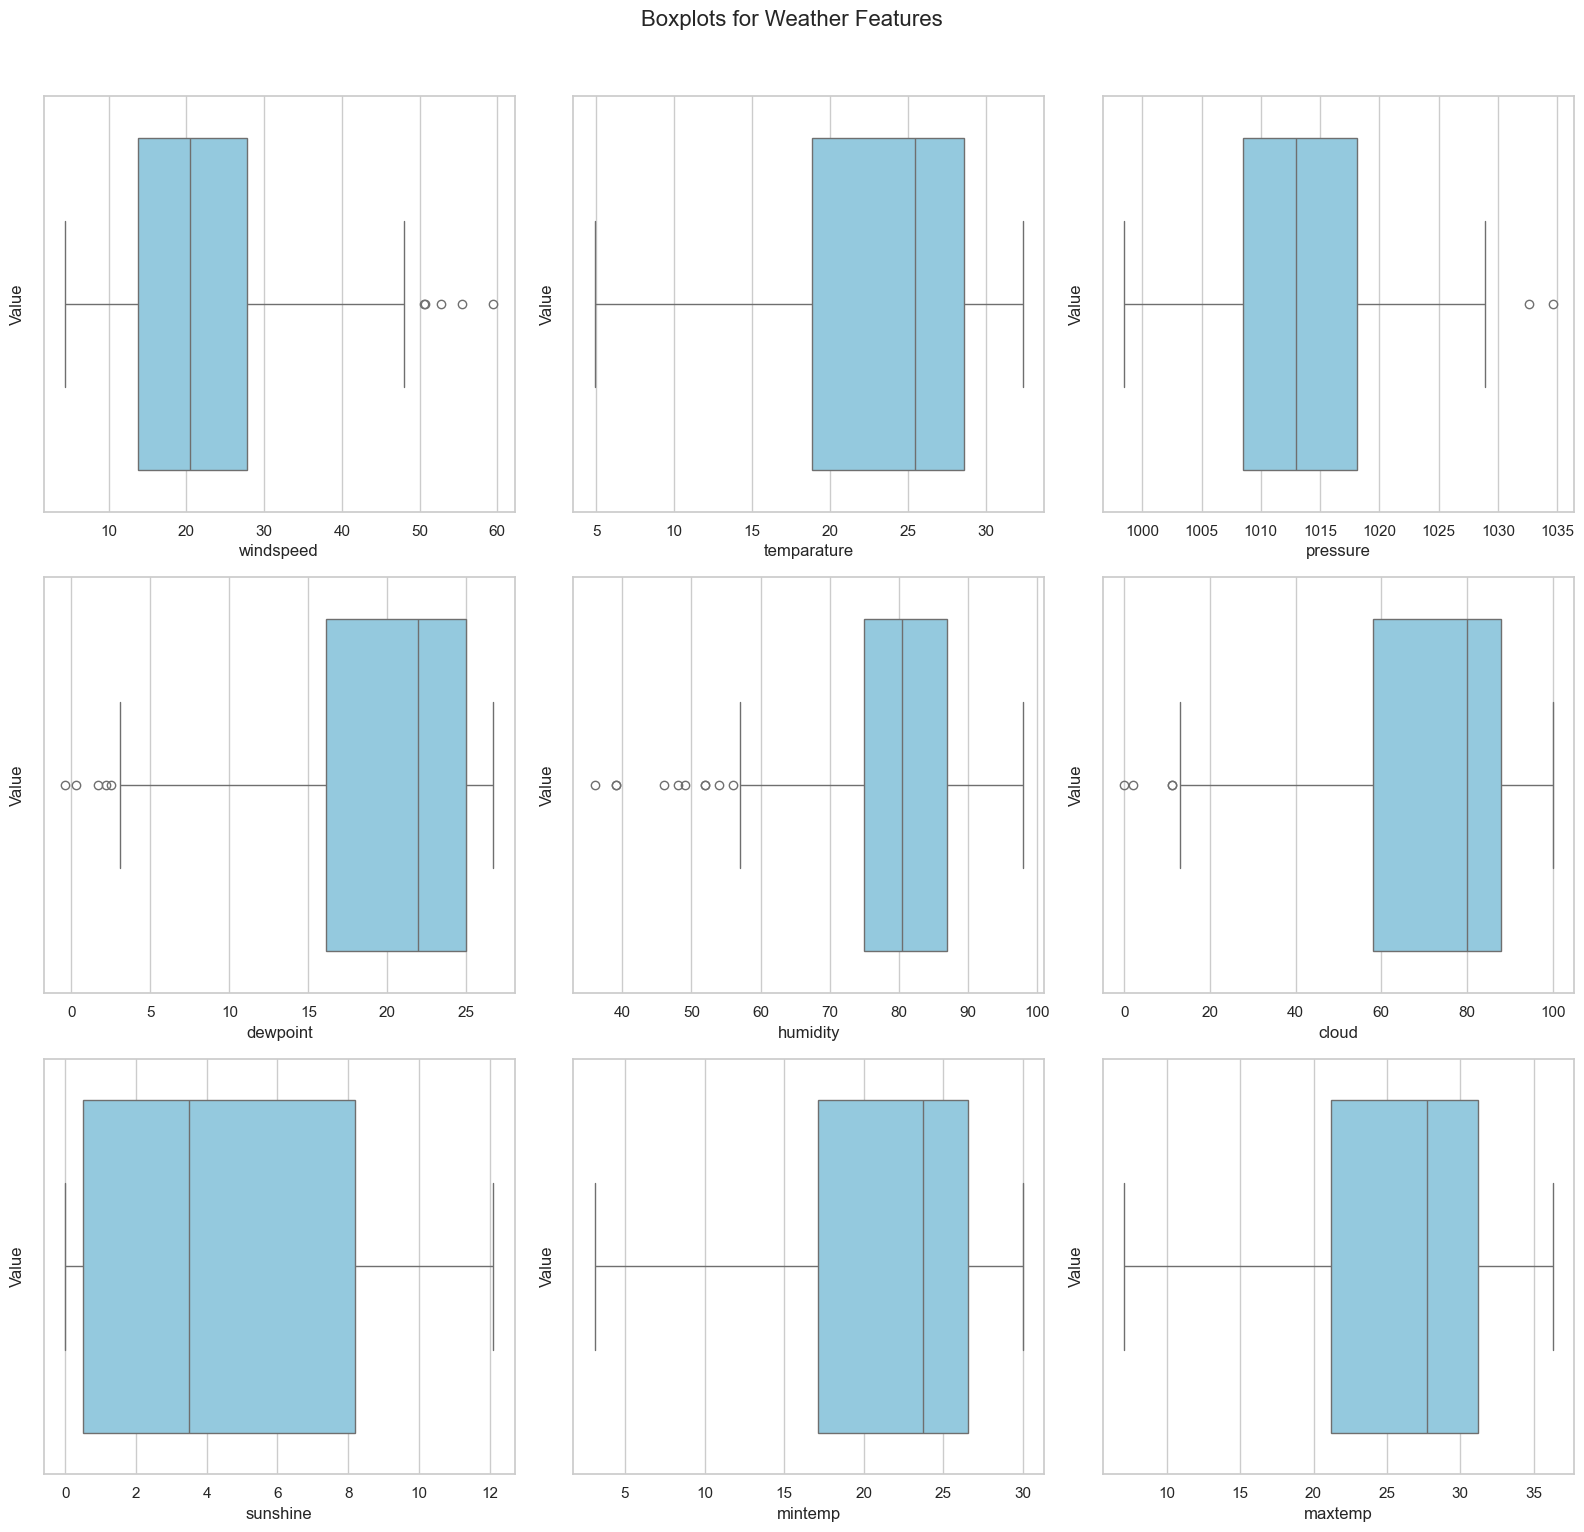

In [174]:
# List of columns to plot
columns_to_plot = [
    'windspeed', 'temparature', 'pressure', 'dewpoint',
    'humidity', 'cloud', 'sunshine', 'mintemp', 'maxtemp'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot[:9]):
    sns.boxplot(x=rain_df[col], ax=axes[i], color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Turn off unused axes (not needed here, but safe)
for j in range(len(columns_to_plot[:9]), len(axes)):
    axes[j].axis('off')

# ✅ Title for all subplots
fig.suptitle('Boxplots for Weather Features', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

In [175]:
# dropping highly correlated features(colums) but leaving one of them
rain_df = rain_df.drop(['maxtemp', 'mintemp', 'temparature'], axis=1)

# drop the day column (not needed)
rain_df = rain_df.drop('day', axis=1)

In [176]:
# numerical distribution of rainfall
rain_df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [177]:
# seperating majority and minority class 
rain_majority = rain_df[rain_df['rainfall'] == 1]
rain_minority = rain_df[rain_df['rainfall'] == 0]
print(rain_majority.shape)
print(rain_minority.shape)

(249, 8)
(117, 8)


In [178]:
# downsample majority to match minority count 
rain_majority_downsample = resample(rain_majority, n_samples=len(rain_minority), random_state=13, replace=False)
rain_majority_downsample.shape

(117, 8)

In [179]:
# combine rain_majority_downsample and rain_minority 
df = pd.concat([rain_majority_downsample, rain_minority])

# sheffle the dataframe 
df = df.sample(frac=1, random_state=13).reset_index(drop=True)
df.shape

(234, 8)

In [180]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1012.5,18.9,93,88,0,0.3,40.0,15.3
1,1018.0,16.6,78,88,1,0.0,20.0,38.3
2,1027.4,11.6,79,88,1,0.2,30.0,15.2
3,1010.1,19.9,91,89,1,0.0,70.0,31.8
4,1009.2,21.9,92,93,1,0.0,190.0,20.5


**SEPARATING FEATURES AND TARGET**

In [181]:
X = df.drop('rainfall', axis=1)
y = df['rainfall']

In [182]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1012.5      18.9        93     88       0.3           40.0       15.3
1      1018.0      16.6        78     88       0.0           20.0       38.3
2      1027.4      11.6        79     88       0.2           30.0       15.2
3      1010.1      19.9        91     89       0.0           70.0       31.8
4      1009.2      21.9        92     93       0.0          190.0       20.5
..        ...       ...       ...    ...       ...            ...        ...
229    1011.5      23.2        76     66       6.7           90.0       22.6
230    1008.4      23.2        81     65       6.4           20.0        7.9
231    1015.2      22.3        89     84       0.1           80.0       35.8
232    1011.2      24.6        78     69      10.7           20.0       11.8
233    1027.1       2.5        59     85       0.4           20.0       21.3

[234 rows x 7 columns]


In [183]:
print(y)

0      0
1      1
2      1
3      1
4      1
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


**SPLITTING THE DATA INTO TRAINING AND TEST DATA**

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)
print(X.shape, X_train.shape, X_test.shape)

(234, 7) (187, 7) (47, 7)


**Model Training**

In [185]:
rf_model = RandomForestClassifier(random_state=13)

param_grid_rf = {
    'n_estimators':[10, 20, 30, 40, 50],
    'max_depth':[None, 5, 10, 15, 20],
    'max_features':['sqrt', 'log2'], 
    'min_samples_split':[2, 5, 10], 
    'min_samples_leaf':[1, 2, 4]
}

In [186]:
# Hypertuning with GridsearchCV 
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=2)

In [187]:
# best model
best_rf_model = grid_search_rf.best_estimator_
print('Best parameters for random Forest :', grid_search_rf.best_params_)

Best parameters for random Forest : {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


**MODEL EVALUATION**

In [188]:
# Cross Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print('Cross validation scores: ', cv_scores)
print('Average cross validation scores: ', np.mean(cv_scores))

Cross validation scores:  [0.92105263 0.71052632 0.75675676 0.83783784 0.78378378]
Average cross validation scores:  0.8019914651493598


In [189]:
# Test data evaluation
y_pred = best_rf_model.predict(X_test) 

In [190]:
print('Test set accuracry: ', accuracy_score(y_test, y_pred))

Test set accuracry:  0.7659574468085106


In [191]:
print('Test set confusion matrix: \n', confusion_matrix(y_test, y_pred))

Test set confusion matrix: 
 [[18  2]
 [ 9 18]]


In [192]:
print('Classification report: \n', classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.90      0.67      0.77        27

    accuracy                           0.77        47
   macro avg       0.78      0.78      0.77        47
weighted avg       0.80      0.77      0.77        47



In [197]:
# Save the model to a file
with open('rainfall_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

**PREDICTION ON UNKWOWN DATA**

In [198]:
# Load the model from the file
with open('rainfall_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)


data = (1016.9, 19.7, 90, 83, 0.0, 40.0, 13.9)

input_data = pd.DataFrame([data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

prediction = model.predict(input_data)
print('Prediction Result: ', 'Rainfall' if prediction[0] == 1 else 'No Rainfall')

Prediction Result:  Rainfall
